In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score, roc_curve
from sklearn import svm
from xgboost import XGBClassifier
from scripts.utils import load_instafake, load_instafinal

In [2]:
iris_data = load_iris()
instafake_data = load_instafake()
instafinal_data = load_instafinal()

# Initial Features

In [47]:
instafake_data['data'].head()

,follower_following_ratio,user_biography_length,user_follower_count,user_following_count,user_has_profil_pic,user_is_private,user_media_count,username_digit_count,username_length
0,0.012907,0.0,25.0,1937.0,1.0,1.0,0.0,0.0,10.0
1,0.078603,0.0,324.0,4122.0,1.0,0.0,0.0,4.0,15.0
2,0.037594,0.0,15.0,399.0,0.0,0.0,0.0,3.0,12.0
3,0.130841,0.0,14.0,107.0,1.0,0.0,1.0,1.0,10.0
4,0.056762,0.0,264.0,4651.0,1.0,0.0,0.0,0.0,14.0


In [48]:
instafinal_data['data'].head()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url
0,0.001,0.257,13,1,1,13,0,0,0,0,0,0
1,0.000,0.958,9,1,0,0,0,1,0,0,0,0
2,0.000,0.253,12,0,0,0,0,0,0,0,0,0
3,0.000,0.977,10,1,0,0,0,0,0,0,0,0
4,0.000,0.321,11,0,0,11,1,0,0,0,0,0


# XGBoost

In [3]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris_data['data'], iris_data['target'], test_size=.2)
# create model instance
bst = XGBClassifier(objective='binary:logistic')
# fit model
bst.fit(X_train_iris, y_train_iris)
# make predictions
preds = bst.predict(X_test_iris)

In [22]:
print(classification_report(preds, y_test_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        12
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [4]:
x_train,x_test,y_train,y_test = train_test_split(instafake_data['data'],instafake_data['target'],test_size=.2,random_state=42,stratify=instafake_data['target'])

In [5]:
xg_clf = XGBClassifier(objective='binary:logistic')
xg_clf.fit(x_train,y_train)
xg_res = xg_clf.predict(x_test)

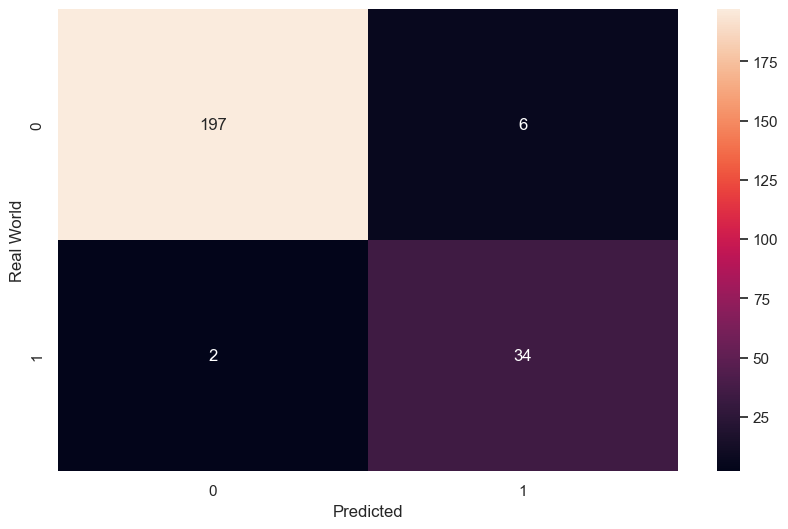

In [12]:
cm = confusion_matrix(xg_res,y_test)
plt.figure(1, figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Real World')
plt.show()

In [52]:
accuracy_score(xg_res, y_test)

0.9665271966527197

In [42]:
print(classification_report(xg_res, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       203
           1       0.85      0.94      0.89        36

    accuracy                           0.97       239
   macro avg       0.92      0.96      0.94       239
weighted avg       0.97      0.97      0.97       239



In [55]:
y_probs = xg_clf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

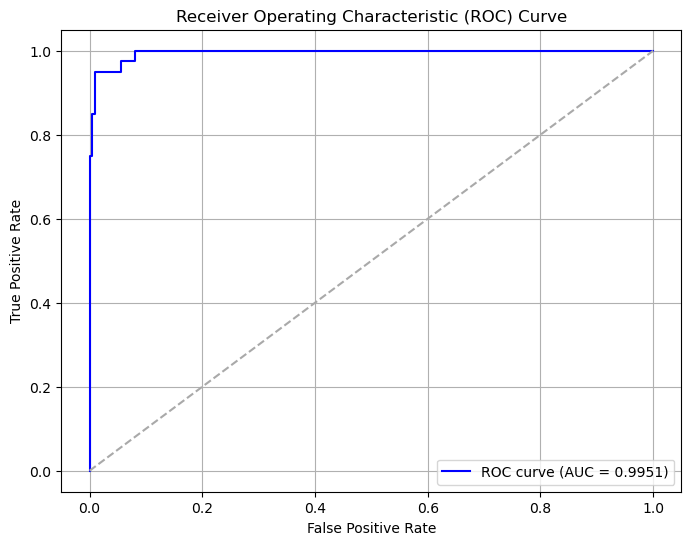

In [59]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# SVM with Meta-Heuristic Optimisation

SVM with no feature selection for base test

In [43]:
svm_clf = svm.SVC()
svm_clf.fit(x_train,y_train)
svm_res = svm_clf.predict(x_test)

In [50]:
print(confusion_matrix(svm_res, y_test))

[[196  13]
 [  3  27]]


In [44]:
print(classification_report(svm_res, y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       209
         1.0       0.68      0.90      0.77        30

    accuracy                           0.93       239
   macro avg       0.83      0.92      0.87       239
weighted avg       0.95      0.93      0.94       239

